In [52]:
from cv2 import threshold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

df = pd.read_csv("/home/kathy/NPHdata.csv")
df.dropna(inplace=True, subset=['File Name'])
df

thresholds = list(np.array(list(range(4079, 169960, 16588))))

                                            File Name  Voxel Count  \
0   C:/Users/yongl/Desktop/code/initial_Normal\Ini...       4079.0   
1   C:/Users/yongl/Desktop/code/initial_Normal\Ini...       6873.0   
2   C:/Users/yongl/Desktop/code/initial_Normal\Ini...       7663.0   
3   C:/Users/yongl/Desktop/code/initial_Normal\Ini...       9228.0   
4   C:/Users/yongl/Desktop/code/initial_Normal\Ini...       9492.0   
..                                                ...          ...   
77  C:/Users/yongl/Desktop/code/initial_NPH\Initia...     149588.0   
78  C:/Users/yongl/Desktop/code/initial_NPH\Initia...     152828.0   
79  C:/Users/yongl/Desktop/code/initial_NPH\Initia...     165196.0   
80  C:/Users/yongl/Desktop/code/initial_NPH\Initia...     168132.0   
81  C:/Users/yongl/Desktop/code/initial_NPH\Initia...     169960.0   

    Normalized  Ventricular Volume (mm^3)  Resnet Has NPH?  \
0          NaN                4937.055727     NaN    FALSE   
1          NaN                6794.

In [53]:
from re import A
import numpy as np

res = {}

list_tp, list_fn, list_fp, list_tn = [], [], [], []

for threshold in thresholds:
    list_tp.append(0)
    list_fn.append(0)
    list_fp.append(0)
    list_tn.append(0)
    for index, instance in df.iterrows():
        actual = instance["Has NPH?"]
        prediction = instance["Manual Threshold - Voxel Count"]
        pred = True if instance['Voxel Count'] > threshold else False
        res.setdefault(threshold, []).append(pred)

        if actual == "TRUE" and pred == True:
            list_tp[-1] += 1
        elif actual == "FALSE" and pred == False:
            list_tn[-1] += 1
        elif actual == "TRUE" and pred == False:
            list_fn[-1] += 1
        elif actual == "FALSE" and pred  == True:
            list_fp[-1] += 1


In [54]:
list_tpr = []
list_fpr = []
for i in range(len(list_fp)):
    list_tpr.append(list_tp[i]/(list_tp[i]+list_fn[i]))
    list_fpr.append(list_fp[i]/(list_tn[i]+list_fp[i]))

0.9087816944959801

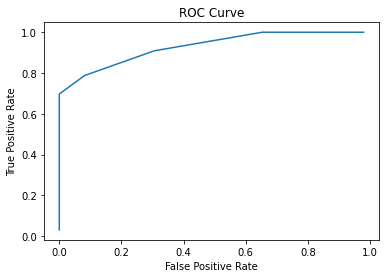

In [55]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.plot(list_fpr, list_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

metrics.auc(list_fpr, list_tpr)